# Initialization of basic libraries


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns #for statistical data visualization
import plotly.express as px # graphing library
import sklearn as sk


In [ ]:
#Load the data set using panda
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

#Our data set did not contain columns name, analysing the data set we found name of columns
#We add columns to the data 
data.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]


#Our goal is to predict according to the features whether a person makes over 50k a year

In [ ]:
#Let's see first 10 entries if it is loaded correctly
data.head(10)

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Exploratory Data analysis

In [ ]:

#the income column is the output


# To see  the shape if the dataset, how many datas and columns
data.shape

#32560 - rows
#15 - columns

(32560, 15)

In [ ]:
data.dtypes

Age               int64
WorkClass        object
fnlwgt            int64
Education        object
EducationNum      int64
MaritalStatus    object
Occupation       object
Relationship     object
Race             object
Gender           object
CapitalGain       int64
CapitalLoss       int64
HoursPerWeek      int64
NativeCountry    object
Income           object
dtype: object

In [ ]:
# The dataset contains a mix of categorical and numeric type data.

#We are more concerned about is which of the features are integer and which  are categorical
#so we can deal with them before feedinf it to the algorithm or train the model

data.isnull().sum()

# we see that there are no null values in either of the features
#But we observed that we have got some `?` marks

# we need to figure out how many question marks are there
# we can delete them to deal with the corrupted data
# or we can fill it with something
# also we need to determine in how many columns do we have these question marks
#

Age              0
WorkClass        0
fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
Income           0
dtype: int64

In [ ]:

data.nunique()
# it gives us the value unique values


Age                 73
WorkClass            9
fnlwgt           21647
Education           16
EducationNum        16
MaritalStatus        7
Occupation          15
Relationship         6
Race                 5
Gender               2
CapitalGain        119
CapitalLoss         92
HoursPerWeek        94
NativeCountry       42
Income               2
dtype: int64

In [ ]:
data.describe().T
# .T means transpose - Rows converted into Columns
# we do some statistical calculations to see

#Our Data's age is spread between 17 to 90 years

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
EducationNum,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
CapitalGain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
CapitalLoss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
HoursPerWeek,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


**Value Count Function**


In [ ]:

data['WorkClass'].value_counts()

# we got 1836 `?` marks , undefined data

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64

In [ ]:
data['Occupation'].value_counts()


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [ ]:
data['NativeCountry'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
data['MaritalStatus'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: MaritalStatus, dtype: int64

In [ ]:
data['Gender'].value_counts()

 Male      21789
 Female    10771
Name: Gender, dtype: int64

In [ ]:
data['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [ ]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



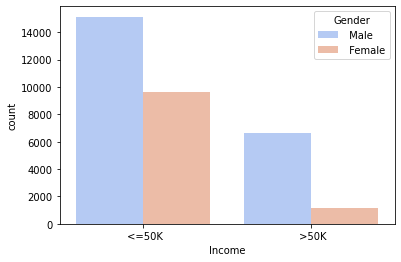

In [ ]:

sns.countplot(data['Income'],palette="coolwarm", hue='Gender', data=data)


#we can see how the income is spread between genders
# we can see that men with income less than <=50k is greater than 14000 , and female is between 8000 and 10000

#

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



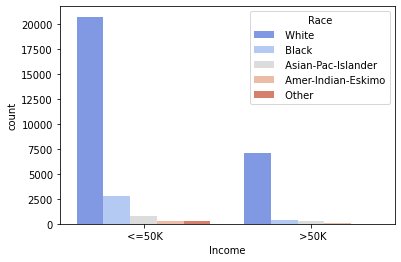

In [ ]:

sns.countplot(data['Income'],palette="coolwarm", hue='Race', data=data)

# Dealing with undefined data , filling the missing values

---



In [ ]:
# replace the values with mode, ( the must common value for given column)

#Columns to replace - 
#1) WorkClass
#2) Occupation
#3) NativeCountry

data['WorkClass'] = data['WorkClass'].replace(' ?','Private')
data['Occupation'] = data['Occupation'].replace(' ?','Prof-specialty')
data['NativeCountry'] = data['NativeCountry'].replace(' ?','United-States')


# data.replace(' ?', np.NaN,inplace=True) #Replacing all the missing values with NaN


In [ ]:
 #Verify the data
 data['NativeCountry'].value_counts()


 United-States                 29169
 Mexico                          643
United-States                    583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

# Feature Engineering

In [ ]:
# we deal with education Category

#To see how many types of Educations there are
data['Education'].value_counts()

#As we see there are many redundant info
# there are  16 education categoies,  some of them are redundant
# we can reduce them in few data
data['Education'] = data['Education'].replace([' Preschool', ' 1st-4th',' 5th-6th', ' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'School')
data['Education'] = data['Education'].replace(' HS-grad','High School')
data['Education'] = data['Education'].replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school',' Some-college'],'Higher education')
data['Education'] = data['Education'].replace(' Bachelors','Undergraduate degree')
data['Education'] = data['Education'].replace(' Masters','Master degree')
data['Education'] = data['Education'].replace(' Doctorate','Post-doctoral degree')

# we are converting in a more meaningful and more sensible data


#Verify the data
data['Education'].value_counts()


High School             10501
Higher education        10316
Undergraduate degree     5354
School                   4253
Master degree            1723
Post-doctoral degree      413
Name: Education, dtype: int64

In [ ]:
# we deal with MaritalStatus category

# To see how many types of MaritalStatus categories
data['MaritalStatus'].value_counts()

#Married-civ-spouse - Married-civ-spouse corresponds to a civilian spouse

# while Married-AF-spouse is a spouse in the Armed Forces. 
# Married-spouse-absent - living apart
data['MaritalStatus'] = data['MaritalStatus'].replace([' Married-civ-spouse',' Married-AF-spouse'],'Married')
data['MaritalStatus'] = data['MaritalStatus'].replace([' Married-spouse-absent',' Separated',' Divorced',' Widowed'],'Divorced')

#we classified all our data in 3 more general categories

#Verify data
data['MaritalStatus'].value_counts()



Married           14999
 Never-married    10682
Divorced           6879
Name: MaritalStatus, dtype: int64

In [ ]:
# we deal with Income
data['Income'].value_counts()

# As we have only  two categories, we can make them two a more simple data as 0 and 1
# 1 means -> >50k
# 0 means -> <50k

data['Income'] = data['Income'].replace(' >50K',1)
data['Income'] = data['Income'].replace(' <=50K',0)

data['Income'].value_counts()


0    24719
1     7841
Name: Income, dtype: int64

# Corelation

In [ ]:
data.corr()

,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
EducationNum,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
CapitalGain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
CapitalLoss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
HoursPerWeek,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


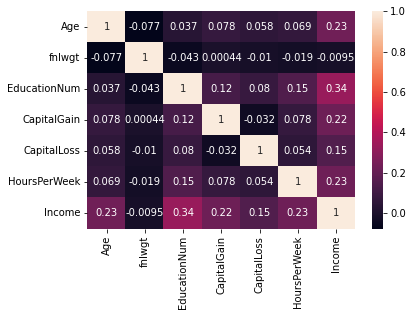

In [ ]:
#just an overall view on corellation
# we dont see many info from here

sns.heatmap(data.corr(),annot=True)

In [ ]:
# Find the shape of the data through Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8229f6a350>,
      dtype=object)

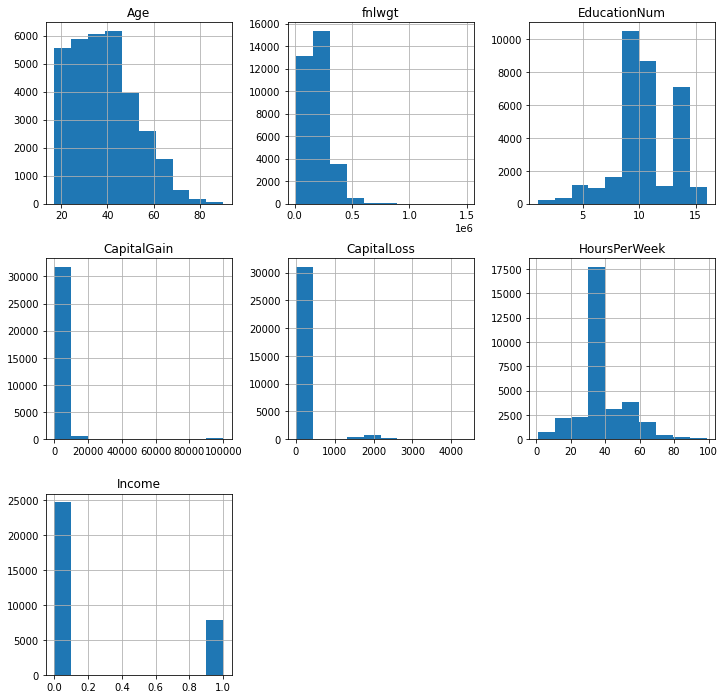

In [ ]:
#approximate representation of the distribution of numerical data

#layout=(nr_rows,nr_columns )
data.hist(figsize=(12,12),layout=(3,3),sharex=False)

# Box Plot


Age                AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
EducationNum    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
CapitalGain        AxesSubplot(0.125,0.391471;0.227941x0.222059)
CapitalLoss     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
HoursPerWeek    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Income                AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

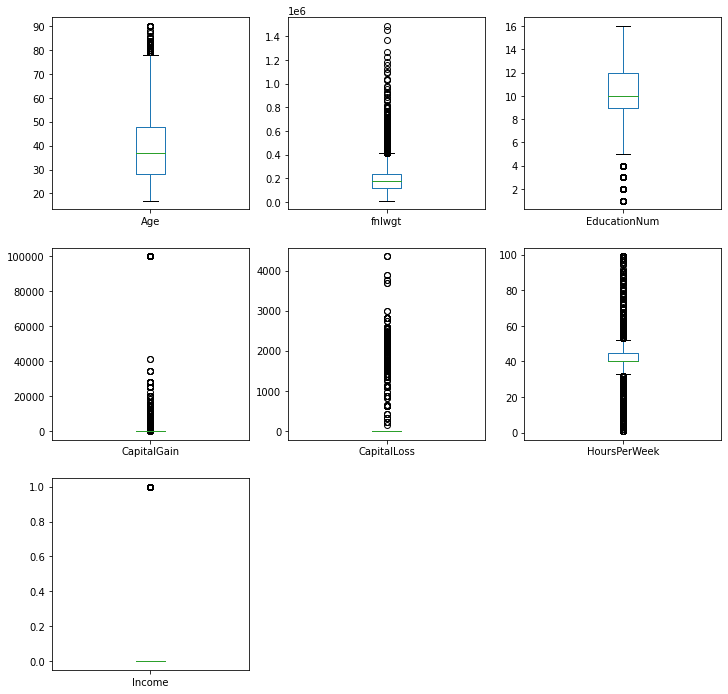

In [ ]:

#A boxplot is a standardized way of displaying the distribution
#of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). 

# gives a good indication of how the values in the data are spread out. 
data.plot(kind='box' , figsize=(12,12),layout= (3,3), sharex = False, subplots = True)

# Plotly

In [ ]:
px.pie(data,values='EducationNum', names='Education',title='% of education',color_discrete_sequence=px.colors.qualitative.Bold)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



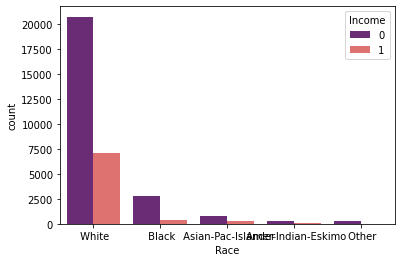

In [ ]:
# we want to see how race is affecting with different things
sns.countplot(data['Race'], hue="Income", data=data, palette='magma')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



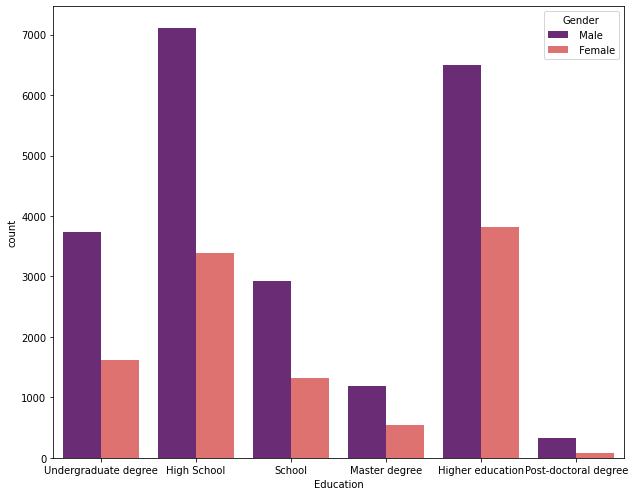

In [ ]:
# lets see how education affects on gender

#adjust size of the plot
plt.figure(figsize=(9,7))
ax= sns.countplot(data['Education'], hue="Gender", data=data, palette='magma')

plt.tight_layout()
plt.show()

# Model Building


# Feature Scaling

In [ ]:
# import library
from sklearn import preprocessing

# make a copy of data
data_copy = data.copy()


# We standardize the data

# Standardization is another scaling technique where the values are centered around the mean with 
# a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant 
# distribution has a unit standard deviation.

#standardization helps us to scale down our feature based on standard normal distribution , the mean is 0 and the standard
# deviation is 1
# the data will be transformed in such a way that it will have the properties of a standard normal  distribution 



#LabelEncoder encode labels with a value between 0 and n_classes-1 
#where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.
#fits our data into computer readable data format
data_copy = data.apply(preprocessing.LabelEncoder().fit_transform)

data_copy.head()

ss=preprocessing.StandardScaler().fit(data_copy.drop('Income',axis=1))
#fit function Compute the mean and std to be used for later scaling.
X= ss.transform(data_copy.drop('Income',axis=1))
Y= data['Income']

from sklearn.model_selection import  train_test_split


# Train/Test is a method to measure the accuracy of your model.
# It is called Train/Test because you split the the data set into two sets: a training set and a testing set.

# You train the model using the training set.
# You test the model using the testing set.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=40)




# Logistic Regression Classifier

---




Accuracy on training data: 0.841
Accuracy on test data: 0.843


Text(0.5, 1.0, '')

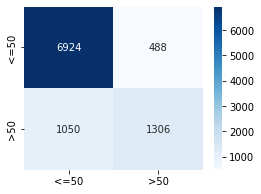

In [ ]:
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()

model=  lr.fit(X_train,Y_train)

prediction = model.predict(X_test)

print("Accuracy on training data: {:,.3f}".format(lr.score(X_train,Y_train)))
print("Accuracy on test data: {:,.3f}".format(lr.score(X_test,Y_test)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test, prediction)
sns.heatmap(ConfMatrix,annot=True, cmap='Blues', fmt="d", xticklabels=['<=50','>50'], yticklabels=['<=50','>50'])

# plt.ylabel('True Label')
# plt.xlabel = ('Predicted Label')
plt.title('')


# Random Forest

Accuracy on training data: 1.000
Accuracy on test data: 0.861


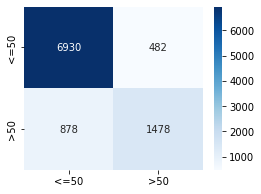

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()

model_1 = rfc.fit(X_train, Y_train)

prediction_1 = model_1.predict(X_test)

print("Accuracy on training data: {:,.3f}".format(rfc.score(X_train,Y_train)))
print("Accuracy on test data: {:,.3f}".format(rfc.score(X_test,Y_test)))

plt.figure(figsize=(4,3))

ConfMatrix = confusion_matrix(Y_test, prediction_1)
sns.heatmap(ConfMatrix,annot=True, cmap='Blues', fmt="d", xticklabels=['<=50','>50'], yticklabels=['<=50','>50'])



# Decision Tree Classifier

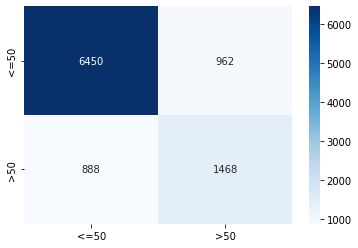

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

model_2 = dtc.fit(X_train,Y_train)
prediction_2 = model_2.predict(X_test)

accuracy_score(Y_test,prediction_2)

ConfMatrix = confusion_matrix(Y_test, prediction_2)
sns.heatmap(ConfMatrix,annot=True, cmap='Blues', fmt="d", xticklabels=['<=50','>50'], yticklabels=['<=50','>50'])



In [ ]:
print("Accuracy on training data: {:,.3f}".format(dtc.score(X_train,Y_train)))
print("Accuracy on test data: {:,.3f}".format(dtc.score(X_test,Y_test)))

Accuracy on training data: 1.000
Accuracy on test data: 0.811


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# We use prediction_1 model because it gave us good results

print(confusion_matrix(Y_test,prediction_1))

[[6930  482]
 [ 878 1478]]


In [ ]:
print(classification_report(Y_test,prediction_1))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7412
           1       0.75      0.63      0.68      2356

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768



In [ ]:
# The formula of Precision is tp/tp+fp

print('Precision =' , 6922/(6922 + 880))

Precision = 0.8872084081004871


In [ ]:
# recall = tp/tp+fn

print('Recall =', 6922/(6922+490))

Recall = 0.9338909875876956


# For the other class : 1(>50K)


In [ ]:
print('Precision = ', 1476/(1476+490))

Precision =  0.7507629704984741


In [ ]:
print('Recall=',1476/(1476+880))


Recall= 0.6264855687606112


# K-Means Clustering



In [ ]:
from sklearn.cluster import KMeans

# We will use data_copy variable which is already standardized data

kmeans = KMeans(init="random",n_clusters=12,n_init=10,max_iter=300,random_state=42)
kmeans.fit(data_copy)

y_hat = kmeans.predict(data_copy)

# How you can visualize the clustering now?
# Well, you cannot do it directly if you have more than 3 columns. 
# However, you can apply a Principal Component Analysis to reduce the space in 2 columns and visualize this instead.

# Calcuating the silhouette coefficient

In [ ]:
# from sklearn.manifold import MDS
# #  some dimension reduction on our features and plot
# embedding = MDS(n_components=2)

# mds = pd.DataFrame(embedding.fit_transform(data_copy.drop('cluster',axis=1)),
#              columns = ['component1','component2'])
# mds['cluster'] = kmeans.predict(data_copy.drop('cluster',axis=1))

# sns.scatterplot(data=mds,x = "component1",y="component2",hue="cluster")

from sklearn import metrics

labels = kmeans.labels_

metrics.silhouette_score(data_copy, labels, metric = 'euclidean')


0.5323630208691218

In [ ]:
# CH Score

metrics.calinski_harabasz_score(data_copy, labels)

397337.0705482599

In [ ]:
#Let's try for another randomly chosen value n_cluster - 8

kmeans_8 = KMeans(init="random",n_clusters=8,n_init=10,max_iter=300,random_state=42)

kmeans_8.fit(data_copy)

y_hat_8 = kmeans_8.predict(data_copy)

labels_8 = kmeans_8.labels_

metrics.silhouette_score(data_copy, labels_8, metric = 'euclidean')

0.5416379888837513

In [ ]:
metrics.calinski_harabasz_score(data_copy, labels_8)

275130.22140365455

We can see that for both types of scores, 12 clusters gives a better value. However we will have to do several iterations with different number of clusters to find the optimal one. Instead, we can use something called an elbow plot to find this optimal value.

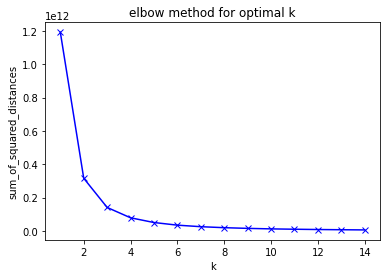

In [ ]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300,random_state=42)
    model = k_means.fit(data_copy)
    sum_of_squared_distances.append(k_means.inertia_)
plt.clf()
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

Here we can see the drop in the sum of squared distance starts to slow down after k=2. Hence 2 is the optimal number of clusters for our analysis.
We can verify this by calculating the silhouette coefficient and CH score for k=2.

Visualising

In [ ]:

kmeans_2 = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)

kmeans_2.fit_predict(data_copy)

y_kmeans = kmeans_2.predict(data_copy)

labels_2 = kmeans_2.labels_

#Let's visualize the results by plotting the data colored by these labels.
# We will also plot the cluster centers as determined by the k-means estimator:




According to the graph, we can see that the elbow starts at 2. Therefore, 2 is the optimal number of clusters.


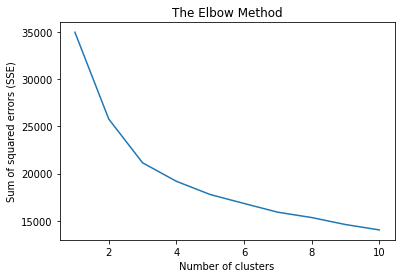

In [ ]:
for attribute in data_copy.columns:
  if (data_copy.dtypes[attribute] == np.object):
    data_copy[attribute], _ = pd.factorize(data_copy[attribute])
    

data_copy = (data_copy-data_copy.min())/(data_copy.max()-data_copy.min())

X = data_copy.iloc[:,0:14]

Y = data_copy.iloc[:,14:15]

sse = []

for k in range(1, 11):
  model = KMeans(n_clusters = k)
  model.fit(X)
  sse.append(model.inertia_)

print('\nAccording to the graph, we can see that the elbow starts at 2. Therefore, 2 is the optimal number of clusters.')

plt.plot(range(1, 11), sse)

plt.xlabel('Number of clusters')

plt.ylabel('Sum of squared errors (SSE)')

plt.title('The Elbow Method');